In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# cargamos todos los conjuntos de datos: 

df_dia = pd.read_csv("./files/productos_dia.csv", index_col = 0)
df_precios = pd.read_csv("./files/precios_productos.csv", index_col = 0)


In [4]:
df_precios.head()

,price,reference_price,product_id,reference_unit,insert_date
6837303,"0,7","0,7",9b1d806ddaed2a3b4c842c361e9171a8,ud,2022-06-08 00:00:00
5137438,"3,19","10,63",baf038a3f001812899adb8beaf4e0ec7,kg,2022-02-10 00:00:00
6005999,"3,99","15,96",ca2fc753e5ea44e8c95888983c1dafe1,l,2022-04-11 00:00:00
6995217,"3,39","5,22",48c959cc94d6d82d1151189b2abe9e83,l,2022-06-19 00:00:00
5760664,"2,79","0,47",8904722366039ba8f147e2e75a5d1ce1,ud,2022-03-25 00:00:00


In [5]:
df_dia.head(2)

,url,supermarket,name,description,product_id
2362486,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,NaN,9e2fda45e63337294f2a604178823026
2362487,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,DIA lavavajillas máquina premium todo en uno e...,NaN,244994c762813d38881cb118742152a2


In [6]:
df_dia.duplicated().sum()

0

In [7]:
df_precios.head(2)

,price,reference_price,product_id,reference_unit,insert_date
6837303,"0,7","0,7",9b1d806ddaed2a3b4c842c361e9171a8,ud,2022-06-08 00:00:00
5137438,"3,19","10,63",baf038a3f001812899adb8beaf4e0ec7,kg,2022-02-10 00:00:00


In [8]:
df_precios.duplicated().sum()

0

In [9]:
df_final2 = df_precios.merge(df_dia, on =["product_id"], how = "right")
df_final2.sample(5)

,price,reference_price,product_id,reference_unit,insert_date,url,supermarket,name,description
130720,"4,59","6,12",c4e5841e3a822b51cbcd71375ab4c083,l,2022-06-11 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,CILLIT BANG limpiador potente antical & sucied...,NaN
723067,"1,25","12,5",7776e807802a4965d4296ae4a60b99ac,kg,2022-05-29 00:00:00,https://www.dia.es/compra-online/despensa/desa...,dia-es,MENTOLIN caramelos de limón y miel bolsa 100 gr,NaN
788986,"3,39","0,07",b371a0ddd871806398c24d927b7e2d84,m,2021-12-03 00:00:00,https://www.dia.es/compra-online/cuidado-perso...,dia-es,COLGATE Total seda dental blíster 50 mt.,NaN
91325,"2,55","3,4",1644b2c49503ae9b053445f1b0b88fdb,l,2021-12-29 00:00:00,https://www.dia.es/compra-online/bodega/vino/t...,dia-es,GERALDINO vino tinto reserva DO Cariñena botel...,NaN
1227615,"1,85","4,63",cb76aba166f9726fb204536a49426282,kg,2022-08-05 00:00:00,https://www.dia.es/compra-online/platos-prepar...,dia-es,DIA VEGECAMPO ensalada de la huerta bandeja 40...,NaN


In [10]:
df_final2.shape

(1264539, 9)

In [11]:
df_final2.duplicated().sum()

0

In [12]:
df_final2.columns

Index(['price', 'reference_price', 'product_id', 'reference_unit',
       'insert_date', 'url', 'supermarket', 'name', 'description'],
      dtype='object')

In [13]:
df_final2.head(2)

,price,reference_price,product_id,reference_unit,insert_date,url,supermarket,name,description
0,"1,59","1,59",9e2fda45e63337294f2a604178823026,ud,2021-08-14 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,NaN
1,"1,59","1,59",9e2fda45e63337294f2a604178823026,ud,2021-08-17 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,NaN


In [14]:
## Gestion de nulos
df_final2.isnull().sum()



price                   29
reference_price         29
product_id               0
reference_unit        1643
insert_date             27
url                      0
supermarket              0
name                     0
description        1264539
dtype: int64

In [15]:
# eliminar columnas que no aportan informacion
df_final2.drop(columns = ["description"], inplace = True)

# Cleaning

In [16]:
df_final2['reference_price']

0          1,59
1          1,59
2          1,59
3          1,59
4          1,59
           ... 
1264534    5,68
1264535    5,68
1264536    5,68
1264537    5,68
1264538    5,68
Name: reference_price, Length: 1264539, dtype: object

**Cambiar tipo de dato**

In [17]:
columnas = ["price", "reference_price"]

for i in columnas: 
    df_final2[i] = df_final2[i].str.replace(",", ".")

In [18]:
df_final2.head()

,price,reference_price,product_id,reference_unit,insert_date,url,supermarket,name
0,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-14 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml
1,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-17 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml
2,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-02 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml
3,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-08 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml
4,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-18 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml


In [19]:
df_final2.dtypes

price              object
reference_price    object
product_id         object
reference_unit     object
insert_date        object
url                object
supermarket        object
name               object
dtype: object

In [20]:
## convertir a float las columnas de precio
for i in columnas: 
    df_final2[i] = df_final2[i].astype(float)

In [21]:
#comprobar que se han convertido correctamente
df_final2.dtypes

price              float64
reference_price    float64
product_id          object
reference_unit      object
insert_date         object
url                 object
supermarket         object
name                object
dtype: object

**Unidades** 

In [22]:
#explorar los datos de las unidades
df_final2.reference_unit.unique()

array(['ud', 'l', 'kg', nan, 'lavado', 'm'], dtype=object)

In [54]:
df_sin_duplicados = df_final2.drop_duplicates(subset=['product_id'], keep='first')


In [55]:
#explorando las unidade4s de tipo m 
df_sin_duplicados[df_final2["reference_unit"] == "m"]


/var/folders/5t/lnzgld3d143_5lcjsgq0d2hm0000gn/T/ipykernel_77855/3549788050.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sin_duplicados[df_final2["reference_unit"] == "m"]


,price,reference_price,product_id,reference_unit,insert_date,url,supermarket,name,date,difference,categoria,subcategoria
249989,1.25,1.25,e294e65ec57bfbb28c15518eca99f417,m,2021-09-08 00:00:00,https://www.dia.es/compra-online/cuidado-perso...,dia-es,BONTE seda dental menta y cera caja 50 metros,2021-09-08,0.00,cuidado-personal,cuidado-bucal
250129,2.59,0.05,8f100f0facbd16bbb68b6f66982493ac,m,2021-08-18 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,DIA SUPER PACO papel de aluminio 50 m.,2021-08-18,-2.54,cuidado-del-hogar,conservacion-de-alimentos
788920,3.39,0.07,b371a0ddd871806398c24d927b7e2d84,m,2022-03-08 00:00:00,https://www.dia.es/compra-online/cuidado-perso...,dia-es,COLGATE Total seda dental blíster 50 mt.,2022-03-08,-3.32,cuidado-personal,cuidado-bucal
789031,1.35,0.27,87fcd5baf3f72b9e542bee26c965f32f,m,2021-11-13 00:00:00,https://www.dia.es/compra-online/cuidado-perso...,dia-es,DR. SOS esparadrapo 5m x 2.5cm + dispensador c...,2021-11-13,-1.08,cuidado-personal,botiquin
789163,3.10,0.10,d70f3d9444c448b08f0b5b1643c717f0,m,2021-11-20 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,ALBAL papel aluminio 30 m,2021-11-20,-3.00,cuidado-del-hogar,conservacion-de-alimentos
789284,1.85,0.09,765e241fa3a6efb741bdc09d340bd4e7,m,2021-12-30 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,ALBAL film transparente corte fácil 20 m,2021-12-30,-1.76,cuidado-del-hogar,conservacion-de-alimentos
789400,1.85,0.06,4f6c2b6558ac5fe616c9d87a44594094,m,2022-03-03 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,ALBAL film transparente 30 m,2022-03-03,-1.79,cuidado-del-hogar,conservacion-de-alimentos
929492,1.49,1.49,3df76ac20f3b61e94708b4043ee78c5a,m,2021-10-16 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,DIA SUPER PACO papel de aluminio 30 m.,2021-10-16,0.00,cuidado-del-hogar,conservacion-de-alimentos
936793,0.99,0.99,2bb62eac21737457e97cd759fd0426a3,m,2021-10-11 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,DIA SUPER PACO film transparente 80 m.,2021-10-11,0.00,cuidado-del-hogar,conservacion-de-alimentos
1085899,1.99,0.07,9284f06032f2fec8fcbf764a20f275c3,m,2021-12-10 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,ALUMFIX papel aluminio 30 m,2021-12-10,-1.92,cuidado-del-hogar,conservacion-de-alimentos


In [56]:
#explorando las unidades de tipo lavado
df_final2[df_final2["reference_unit"] == "lavado"]

,price,reference_price,product_id,reference_unit,insert_date,url,supermarket,name,date,difference,categoria,subcategoria
45246,5.10,0.14,06babee2a8fbb7f86eb1f3db7208bc85,lavado,2021-10-05 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,DIA detergente máquina polvo maleta 36 cacitos,2021-10-05,-4.96,cuidado-del-hogar,cuidado-de-la-ropa
45247,5.10,0.14,06babee2a8fbb7f86eb1f3db7208bc85,lavado,2021-08-16 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,DIA detergente máquina polvo maleta 36 cacitos,2021-08-16,-4.96,cuidado-del-hogar,cuidado-de-la-ropa
45248,5.15,0.14,06babee2a8fbb7f86eb1f3db7208bc85,lavado,2021-10-28 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,DIA detergente máquina polvo maleta 36 cacitos,2021-10-28,-5.01,cuidado-del-hogar,cuidado-de-la-ropa
45249,5.10,0.14,06babee2a8fbb7f86eb1f3db7208bc85,lavado,2021-09-28 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,DIA detergente máquina polvo maleta 36 cacitos,2021-09-28,-4.96,cuidado-del-hogar,cuidado-de-la-ropa
45250,5.10,0.14,06babee2a8fbb7f86eb1f3db7208bc85,lavado,2021-09-20 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,DIA detergente máquina polvo maleta 36 cacitos,2021-09-20,-4.96,cuidado-del-hogar,cuidado-de-la-ropa
...,...,...,...,...,...,...,...,...,...,...,...,...
1263712,5.99,0.15,6c08f337768f5a04c05d86856e46480d,lavado,2021-10-23 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,ELENA detergente maquina polvo maleta 30 + 12 ...,2021-10-23,-5.84,cuidado-del-hogar,cuidado-de-la-ropa
1263713,5.99,0.15,6c08f337768f5a04c05d86856e46480d,lavado,2022-01-02 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,ELENA detergente maquina polvo maleta 30 + 12 ...,2022-01-02,-5.84,cuidado-del-hogar,cuidado-de-la-ropa
1263714,5.99,0.15,6c08f337768f5a04c05d86856e46480d,lavado,2021-09-09 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,ELENA detergente maquina polvo maleta 30 + 12 ...,2021-09-09,-5.84,cuidado-del-hogar,cuidado-de-la-ropa
1263715,5.99,0.15,6c08f337768f5a04c05d86856e46480d,lavado,2022-05-30 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,ELENA detergente maquina polvo maleta 30 + 12 ...,2022-05-30,-5.84,cuidado-del-hogar,cuidado-de-la-ropa


**Para quitar la hora**



In [26]:
## quittamos la hora de la fecha porque no aporta informacion, siempre es la misma
df_final2["insert_date"]

0          2021-08-14 00:00:00
1          2021-08-17 00:00:00
2          2021-08-02 00:00:00
3          2021-08-08 00:00:00
4          2021-08-18 00:00:00
                  ...         
1264534    2022-01-03 00:00:00
1264535    2022-06-04 00:00:00
1264536    2022-07-01 00:00:00
1264537    2022-01-19 00:00:00
1264538    2022-02-13 00:00:00
Name: insert_date, Length: 1264539, dtype: object

In [27]:
#solo me quedo con la fecha, hago un split con el espacio y me quedo con la primera parte
df_final2["date"] = df_final2["insert_date"].str.split(" ").str[0]
df_final2.head()

,price,reference_price,product_id,reference_unit,insert_date,url,supermarket,name,date
0,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-14 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,2021-08-14
1,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-17 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,2021-08-17
2,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-02 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,2021-08-02
3,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-08 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,2021-08-08
4,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-18 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,2021-08-18


In [28]:
#ahora convierto la fecha en formato datetime
df_final2["date"] = pd.to_datetime(df_final2["date"])

In [29]:
#compruebo que se ha convertido correctamente
df_final2.dtypes

price                     float64
reference_price           float64
product_id                 object
reference_unit             object
insert_date                object
url                        object
supermarket                object
name                       object
date               datetime64[ns]
dtype: object

In [30]:
# otra opción usando una función: 

def separar_fecha(x):
    return x.split(" ")[0]

In [31]:
#df_final2["date2"] = df_final2["insert_date"].apply(separar_fecha)
#df_final2.head()

**Para calcular la diferencia de precios**

In [32]:
def sacar_diferencia(precio, precio_referencia):
    return precio_referencia - precio

In [33]:
df_final2["difference"] = df_final2.apply(lambda x: sacar_diferencia(x["price"], x["reference_price"]), axis = 1)
df_final2.head()

,price,reference_price,product_id,reference_unit,insert_date,url,supermarket,name,date,difference
0,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-14 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,2021-08-14,0.0
1,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-17 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,2021-08-17,0.0
2,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-02 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,2021-08-02,0.0
3,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-08 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,2021-08-08,0.0
4,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-18 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,2021-08-18,0.0


## Análisis de categorías

**Para sacar categorías, subcategorias**

**Patrones de url**

In [34]:
# viendo la url de un producto especifico
df_final2["url"][0]

'https://www.dia.es/compra-online/cuidado-del-hogar/lavavajillas/p/181184'

In [35]:
df_final2["url"][7]

'https://www.dia.es/compra-online/cuidado-del-hogar/lavavajillas/p/181184'

In [36]:
df_final2["url"][410]

'https://www.dia.es/compra-online/cuidado-del-hogar/lavavajillas/p/211650'

In [37]:
def extraer_categorias(url):
    partes = url.split("/")  # Dividir la URL por "/"
    try:
        categoria = partes[4]  # Ajusta este índice según la estructura de tu URL
        subcategoria = partes[5] if len(partes) > 5 else None  # Ajusta este índice
        return pd.Series([categoria, subcategoria])
    except IndexError:
        return pd.Series([None, None])


In [38]:
df_final2[["categoria","subcategoria"]] = df_final2.apply(lambda x: extraer_categorias(x["url"]), axis=1, result_type="expand")


In [39]:
df_final2['categoria'].unique()

array(['cuidado-del-hogar', 'cuidado-del-hogar-de-limpieza', 'mascotas',
       'platos-preparados', 'al-dia', 'despensa', 'bebidas', 'bodega',
       'bebe', 'congelados', 'cuidado-personal', 'eco', 'caducidad',
       'peso', 'frescos', 'dulces-de-navidad', 'bulto-mixto',
       'desayunos-y-dulces', 'clasificacion-de-categorias',
       'cuidado-corporal', 'conservas'], dtype=object)

In [40]:
df_final2['subcategoria'].unique()

array(['lavavajillas', 'bano', 'perros', 'hogar', 'ambientadores',
       'calzado', 'insecticidas', 'gatos', 'nuestra-cocina-al-dia',
       'gazpachos-y-salmorejos', 'charcuteria-y-quesos',
       'desayunos-y-dulces', 'conservas', 'pastas-harinas-y-masas',
       'aceites-vinagres-y-alinos', 'cocina-internacional',
       'bebidas-isotonicas-y-energeticas', 'espumosos', 'panales',
       'utensilios-de-limpieza', 'dieteticos', 'helados', 'afeitado',
       'botiquin', 'depilacion', 'bano-e-higiene-personal',
       'cuidado-bucal', 'cuidado-corporal', 'toallitas', 'cuidado-intimo',
       'cuidado-del-bebe', 'sopas', 'pan', 'sal-y-especias',
       'cuidado-de-la-ropa', 'pescado-y-marisco', 'cocina', 'aguas',
       'refrescos', 'cervezas', 'zumos', 'batidos-y-horchata', 'vino',
       'vinos-de-mesa-sangrias-y-tintos-de-verano', 'alcoholes', 'frutas',
       'aperitivos', 'pescado', 'verduras', 'bocadillos-y-sandwich',
       'carne', 'croquetas-y-aperitivos', 'verduras-y-hortaliza

In [41]:
df_final2.head()

,price,reference_price,product_id,reference_unit,insert_date,url,supermarket,name,date,difference,categoria,subcategoria
0,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-14 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,2021-08-14,0.0,cuidado-del-hogar,lavavajillas
1,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-17 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,2021-08-17,0.0,cuidado-del-hogar,lavavajillas
2,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-02 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,2021-08-02,0.0,cuidado-del-hogar,lavavajillas
3,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-08 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,2021-08-08,0.0,cuidado-del-hogar,lavavajillas
4,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-18 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,2021-08-18,0.0,cuidado-del-hogar,lavavajillas


In [42]:
## otra función para obtener categorias y subcategorias
def sacar_info(x):
    if "al-dia" in x:
        return "frescos", x.split("/")[5]

    elif "bulto-mixto" in x or "peso" in x or "caducidad" in x or "clasificacion-de-categorias" in x:
        return x.split("/")[5], x.split("/")[6]
        
    else:
        return x.split("/")[4], x.split("/")[5]

In [43]:
def reemplazar(x):
    if x == 'cuidado-del-hogar-de-limpieza':
        return 'cuidado-del-hogar'
    else:
        return x

In [44]:
df_final2["categoria"] = df_final2["categoria"].apply(reemplazar)

In [45]:
df_final2.head(1)

,price,reference_price,product_id,reference_unit,insert_date,url,supermarket,name,date,difference,categoria,subcategoria
0,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-14 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,2021-08-14,0.0,cuidado-del-hogar,lavavajillas


In [46]:
# ¿Qué categoría es la que vende más productos? 
df_final2.groupby(["categoria"]).count()

,price,reference_price,product_id,reference_unit,insert_date,url,supermarket,name,date,difference,subcategoria
categoria,,,,,,,,,,,
al-dia,96411,96411,96413,96411,96411,96413,96413,96413,96411,96411,96413
bebe,38162,38162,38162,38162,38162,38162,38162,38162,38162,38162,38162
bebidas,94660,94660,94660,94660,94660,94660,94660,94660,94660,94660,94660
bodega,51895,51895,51895,51895,51895,51895,51895,51895,51895,51895,51895
bulto-mixto,468,468,468,468,468,468,468,468,468,468,468
caducidad,473,473,473,473,473,473,473,473,473,473,473
clasificacion-de-categorias,429,429,429,429,429,429,429,429,429,429,429
congelados,52580,52580,52582,52521,52580,52582,52582,52582,52580,52580,52582
conservas,289,289,289,289,289,289,289,289,289,289,289


In [47]:
# lo podemos hacer un size también  que es lo mismo que el count, pero sin darme la información para cada columna. 
df_categoria = df_final2.groupby(["categoria"]).size().reset_index()
df_categoria.columns = ["categoria", "conteo"]
df_categoria.sort_values(by ="conteo", inplace=True, ascending = False)
df_categoria.head(2)

,categoria,conteo
13,despensa,434676
11,cuidado-personal,212626


/var/folders/5t/lnzgld3d143_5lcjsgq0d2hm0000gn/T/ipykernel_77855/1758326271.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_categoria, x = "categoria", y = "conteo", palette=sns.color_palette("YlOrBr"))
/var/folders/5t/lnzgld3d143_5lcjsgq0d2hm0000gn/T/ipykernel_77855/1758326271.py:4: UserWarning: 
The palette list has fewer values (6) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data = df_categoria, x = "categoria", y = "conteo", palette=sns.color_palette("YlOrBr"))


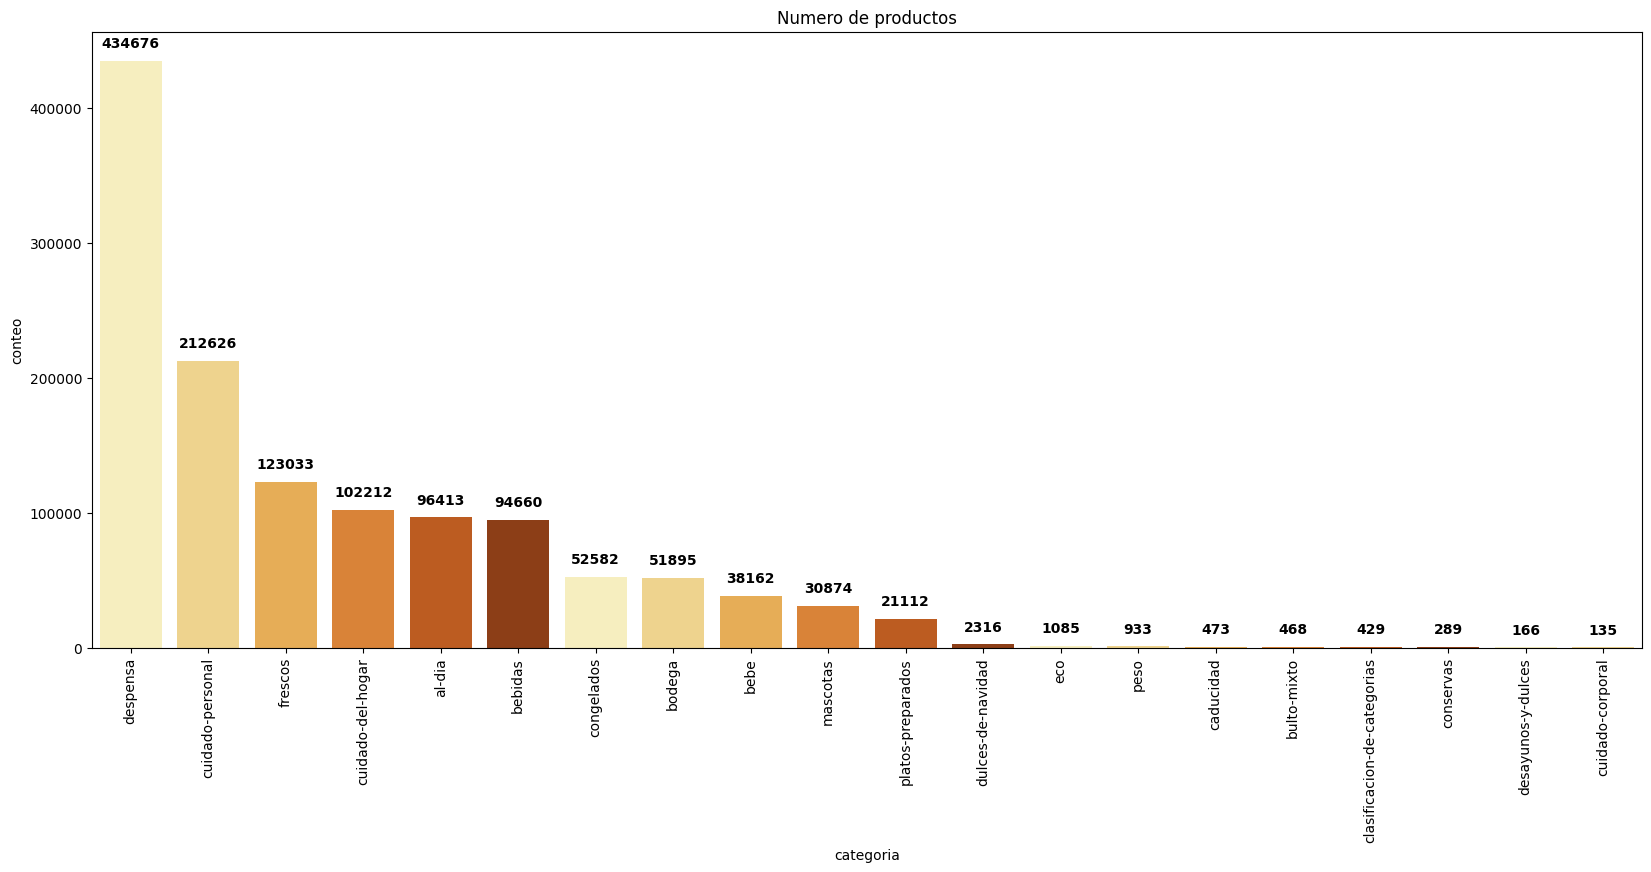

In [48]:
# Como lo veríamos visualmente

plt.figure(figsize =(20,8)) # para establecer el tamaño de la gráfica
sns.barplot(data = df_categoria, x = "categoria", y = "conteo", palette=sns.color_palette("YlOrBr")) 
plt.xticks(rotation=90) # para girar las etiquetas del eje-x
plt.title("Numero de productos")

# para poner etiquetas encima de las barras
for indice, valor in enumerate(df_categoria["conteo"]):
    plt.text(indice, valor + 10000, str(valor),
             horizontalalignment='center', # para colocarlo en el centro de la barra
             fontweight = "bold") 

plt.show();

In [49]:
# 3. Dentro de cada categoría, ¿qué subcategorías son más populares? 
df_categoria_subcategoria = df_final2.groupby(["categoria", "subcategoria"]).size().reset_index()
df_categoria_subcategoria.rename(columns={0:"conteo"}, inplace=True)
df_categoria_subcategoria.sort_values(by = "conteo", ascending=False, inplace=True)
df_categoria_subcategoria.head(2)

,categoria,subcategoria,conteo
67,despensa,desayunos-y-dulces,166791
54,cuidado-personal,bano-e-higiene-personal,95560


In [50]:
#plt.figure(figsize =(20,8))
#sns.barplot(data = df_categoria_subcategoria, x = "categoria", y = "conteo", hue = "subcategoria", palette=sns.color_palette("YlOrBr"))
#plt.xticks(rotation=90)
#plt.show();

In [51]:
#4. ¿Qué categoría es la que tiene los precios más altos? ¿y los mínimos? ¿Cuál es su media? 
df_final2.groupby(["categoria"])["price"].agg(["mean", "max", "min", "median"])

,mean,max,min,median
categoria,,,,
al-dia,3.704284,135.00,0.18,2.09
bebe,4.662929,25.74,0.75,3.29
bebidas,1.711525,14.99,0.15,1.19
bodega,6.331031,33.84,0.65,4.75
bulto-mixto,2.019679,3.19,1.25,1.60
caducidad,1.952918,3.29,0.95,1.99
clasificacion-de-categorias,2.118089,3.25,0.68,2.89
congelados,3.116007,22.89,0.49,2.59
conservas,4.188235,4.75,3.19,4.00


## Análisis de precios y productos

In [58]:
##Si hay valores extremadamente altos que están afectando la escala, podemos filtrar precios dentro de un rango razonable antes de graficar.

percentile_99 = df_final2['price'].quantile(0.99)
filtered_prices = df_final2[df_final2['price'] <= percentile_99]

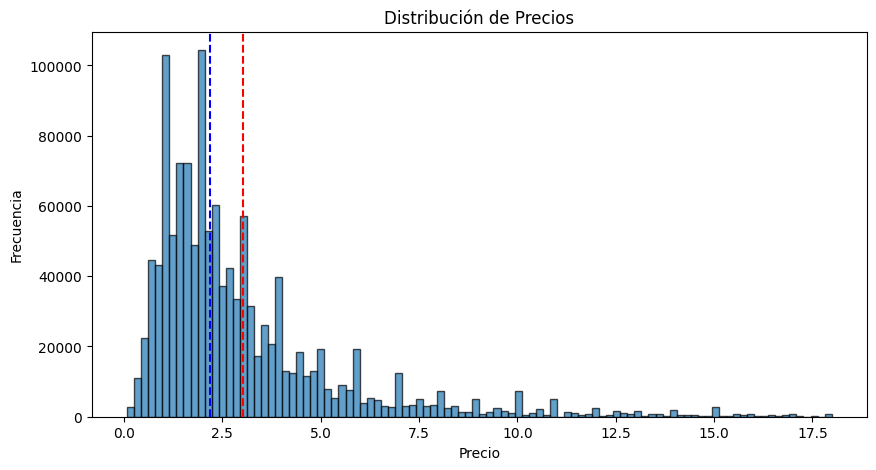

In [59]:
## ¿Existen productos con precios fuera de lo común (outliers)?

plt.figure(figsize=(10, 5))
plt.hist(filtered_prices['price'], bins=100, edgecolor='black', alpha=0.7)
plt.axvline(filtered_prices['price'].mean(), color='red', linestyle='--', label='Media')
plt.axvline(filtered_prices['price'].median(), color='blue', linestyle='--', label='Mediana')
plt.title("Distribución de Precios")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

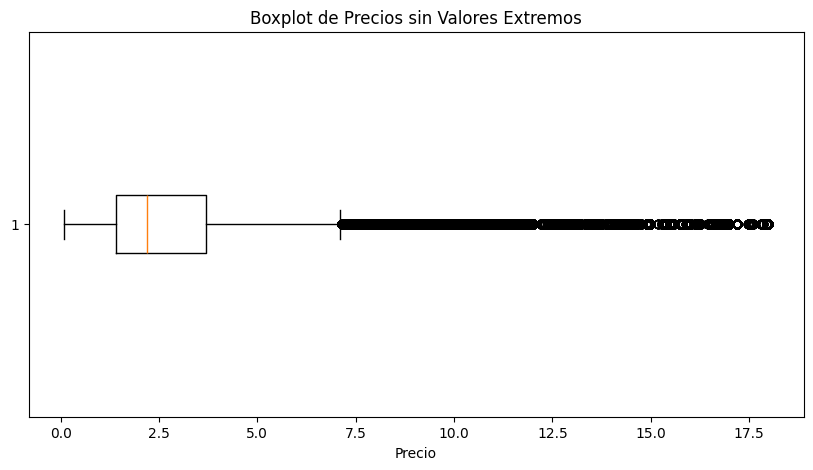

In [60]:
# Graficar boxplot sin los valores extremos
plt.figure(figsize=(10, 5))
plt.boxplot(filtered_prices['price'], vert=False)
plt.title("Boxplot de Precios sin Valores Extremos")
plt.xlabel("Precio")
plt.show()


In [61]:
## - ¿Cuántos productos tienen un precio superior al precio de referencia?

# Filtrar productos cuyo precio es mayor al precio de referencia
productos_mas_caros = df_final2[df_final2['price'] > df_final2['reference_price']]

# Contar cuántos productos cumplen esta condición
cantidad_productos = productos_mas_caros.shape[0]
cantidad_productos

194374

In [ ]:
## - ¿Qué categorías de productos tienen la mayor y menor variación de precios?

# Agrupar por categoría y calcular la desviación estándar del precio
# Agrupa por categoría y calcula la desviación estándar de los precios.
#Ordena por mayor y menor variabilidad para identificar las categorías con más y menos fluctuación.

variacion_precios = df_final2.groupby('categoria')['price'].std().reset_index()
variacion_precios = variacion_precios.rename(columns={'price': 'desviacion_estandar'})

# Ordenar por mayor y menor variabilidad
mayor_variacion = variacion_precios.sort_values(by='desviacion_estandar', ascending=False).head(5)
menor_variacion = variacion_precios.sort_values(by='desviacion_estandar', ascending=True).head(5)

# Mostrar resultados
print("Categorías con mayor variación de precios:")
print(mayor_variacion)

print("\nCategorías con menor variación de precios:")
print(menor_variacion)

Categorías con mayor variación de precios:
           categoria  desviacion_estandar
16           frescos            17.601474
0             al-dia             8.780750
3             bodega             5.100121
11  cuidado-personal             4.539605
1               bebe             4.206853

Categorías con menor variación de precios:
             categoria  desviacion_estandar
9     cuidado-corporal             0.000000
12  desayunos-y-dulces             0.031933
8            conservas             0.277608
4          bulto-mixto             0.708516
5            caducidad             0.923326


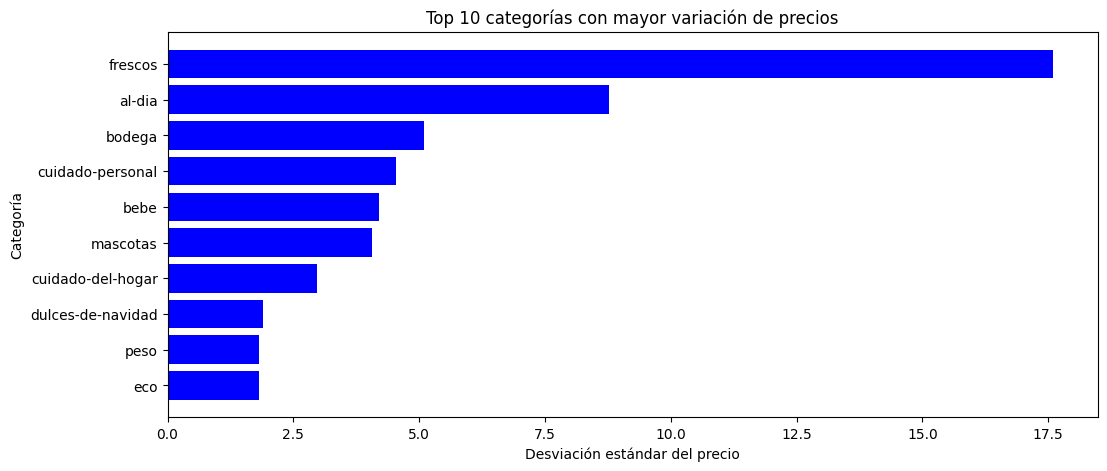

In [ ]:

# Ordenar categorías por variabilidad
variacion_precios_sorted = variacion_precios.sort_values(by='desviacion_estandar', ascending=False)

# Graficar las 10 categorías con mayor variación de precios
plt.figure(figsize=(12, 5))
plt.barh(variacion_precios_sorted['categoria'].head(10), variacion_precios_sorted['desviacion_estandar'].head(10), color='blue')
plt.xlabel("Desviación estándar del precio")
plt.ylabel("Categoría")
plt.title("Top 10 categorías con mayor variación de precios")
plt.gca().invert_yaxis()  # Invertir el eje Y para mejor visualización
plt.show()


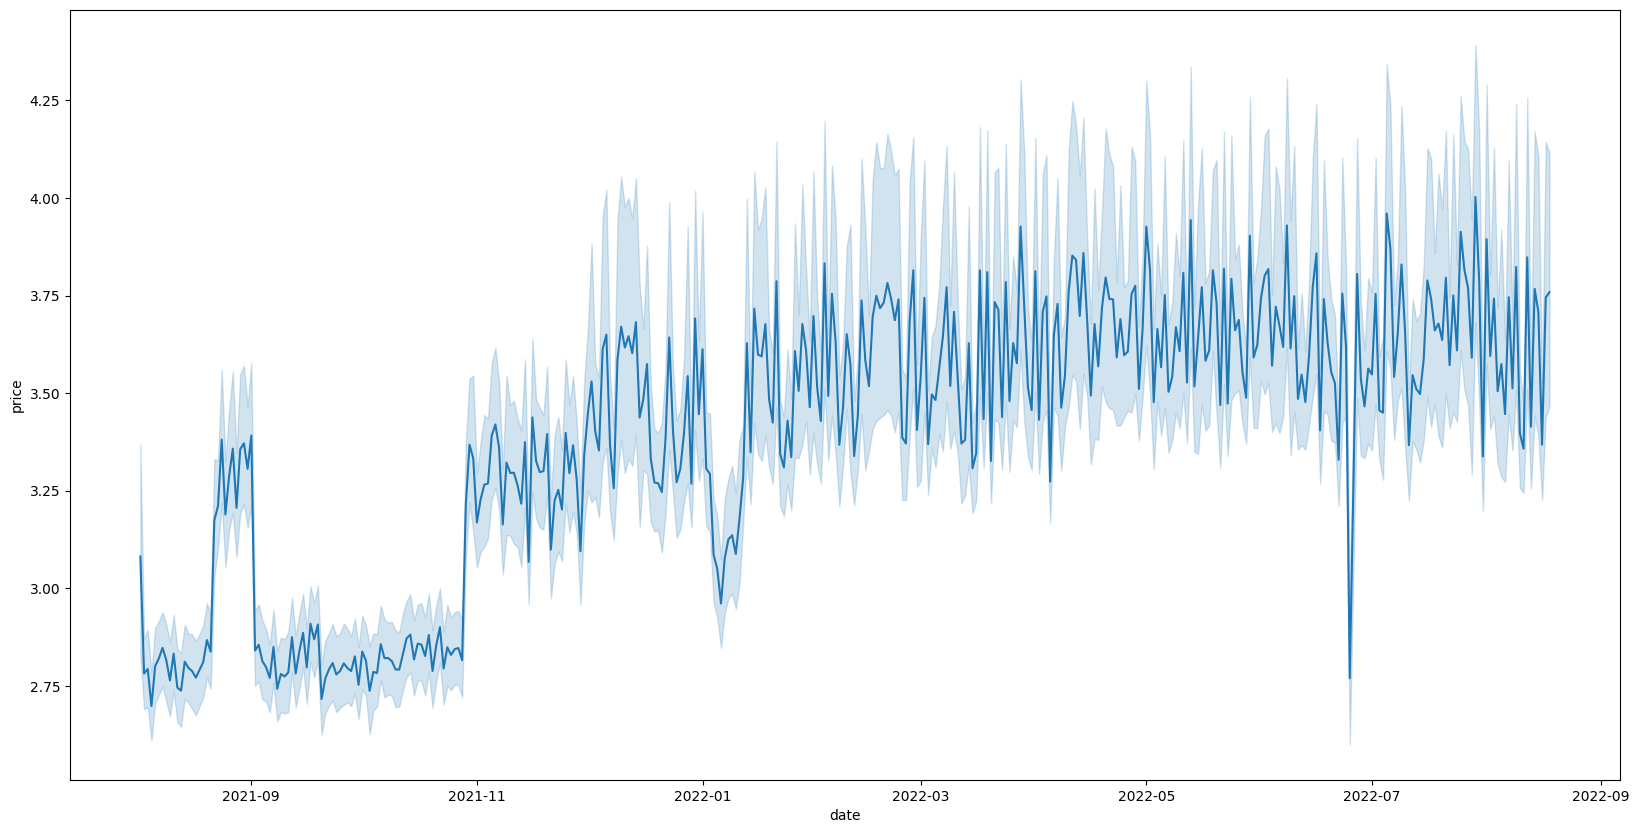

In [ ]:
#¿Cómo varían los precios de los productos a lo largo del tiempo?
plt.figure(figsize=(20,10))
sns.lineplot(data=df_final2, x="date", y="price");

## Análisis de productos


In [63]:
# ¿Qué productos tienen más registros de precios?
# Contar cuántos registros de precios tiene cada producto
productos_mas_registrados = df_final2['product_id'].value_counts().reset_index()
productos_mas_registrados.columns = ['product_id', 'num_registros']

# Mostrar los 10 productos con más registros de precios
print(productos_mas_registrados.head(10))


                         product_id  num_registros
0  cd3f6bc51b2d934c1e46b0136ed62779           1384
1  5d2d1ed4575049c5cf5bea27ea6bad2c           1225
2  17c01da71d8e7a36cf32fd6f34f29625           1068
3  2f268ae7ec6b26d49f1f463c4dd49244           1020
4  b9c8b94b603a4b69e4454717730eab8c            930
5  cd8ce5872c384f6b95e09a887b5a2759            870
6  8cbd3b92d31f10e7bcaafce818654e62            865
7  0b85e2c5f911b8cdf01d31b23743981d            835
8  e4dbfbdaf6a4e25a6f3cf630a7e5e9fa            825
9  6d09c75e921233153ab9c7fe75ef81d6            788


In [62]:
#- ¿Cuántos productos distintos hay en el dataset?
# Contar el número de productos únicos
num_productos_distintos = df_final2['product_id'].unique()
num_productos_distintos = len(num_productos_distintos)

print(f"Número de productos distintos en el dataset: {num_productos_distintos}")


Número de productos distintos en el dataset: 9496


In [66]:
## - ¿Existen productos en el dataset de precios que no tienen información en el dataset de productos?
# Identificar los productos en cada dataset
productos_precios_set = set(df_final2['product_id'])
productos_info_set = set(df_precios['product_id'])

# Encontrar productos en precios que no están en productos_dia
productos_sin_info = productos_precios_set - productos_info_set

print(f"Número de productos en precios que no tienen información en productos_dia: {len(productos_sin_info)}")

# Convertir a DataFrame para visualización
productos_sin_info_df = pd.DataFrame(list(productos_sin_info), columns=['product_id'])

print(productos_sin_info_df.head(10))  # Mostrar los primeros 10 productos sin información

Número de productos en precios que no tienen información en productos_dia: 27
Número de productos en precios que no tienen información en productos_dia: 27
                         product_id
0  a3730de717d3e8eaf348f319a6ca324f
1  42e03712b67eb4d08553ffc72296e735
2  4744d70c892c8a18061c63b4e3758a06
3  584a4b590849c0b8166dc74d972e0b52
4  816168177d2b1dadc30f62583ea3df36
5  17fb2d7d4e7c7a3595793911abd08aee
6  e4779f84a0ede8f2af528bb0fb20f632
7  d24a2a52f1dab8e7f0ca1cedccea688b
8  8737845aa206972d0f3978a101ee6736
9  e12017ee1ec3426dfa0d5f390f8d6aeb


## Relación entre precios y unidades de medida


In [67]:
#- ¿Cuál es el precio medio por unidad de referencia de cada producto?

# Calcular el precio medio por unidad de referencia de cada producto
precio_medio_unidad = df_final2.groupby('reference_unit')['price'].mean().reset_index()
precio_medio_unidad = df_final2.rename(columns={'price': 'precio_medio'})

# Mostrar los resultados
print("Precio medio por unidad de referencia:")
print(precio_medio_unidad)

Precio medio por unidad de referencia:
         precio_medio  reference_price                        product_id  \
0                1.59             1.59  9e2fda45e63337294f2a604178823026   
1                1.59             1.59  9e2fda45e63337294f2a604178823026   
2                1.59             1.59  9e2fda45e63337294f2a604178823026   
3                1.59             1.59  9e2fda45e63337294f2a604178823026   
4                1.59             1.59  9e2fda45e63337294f2a604178823026   
...               ...              ...                               ...   
1264534          1.25             5.68  1fd60bcc17c04fc705ea7515dbd42034   
1264535          1.25             5.68  1fd60bcc17c04fc705ea7515dbd42034   
1264536          1.25             5.68  1fd60bcc17c04fc705ea7515dbd42034   
1264537          1.25             5.68  1fd60bcc17c04fc705ea7515dbd42034   
1264538          1.25             5.68  1fd60bcc17c04fc705ea7515dbd42034   

        reference_unit          insert_date  \
0

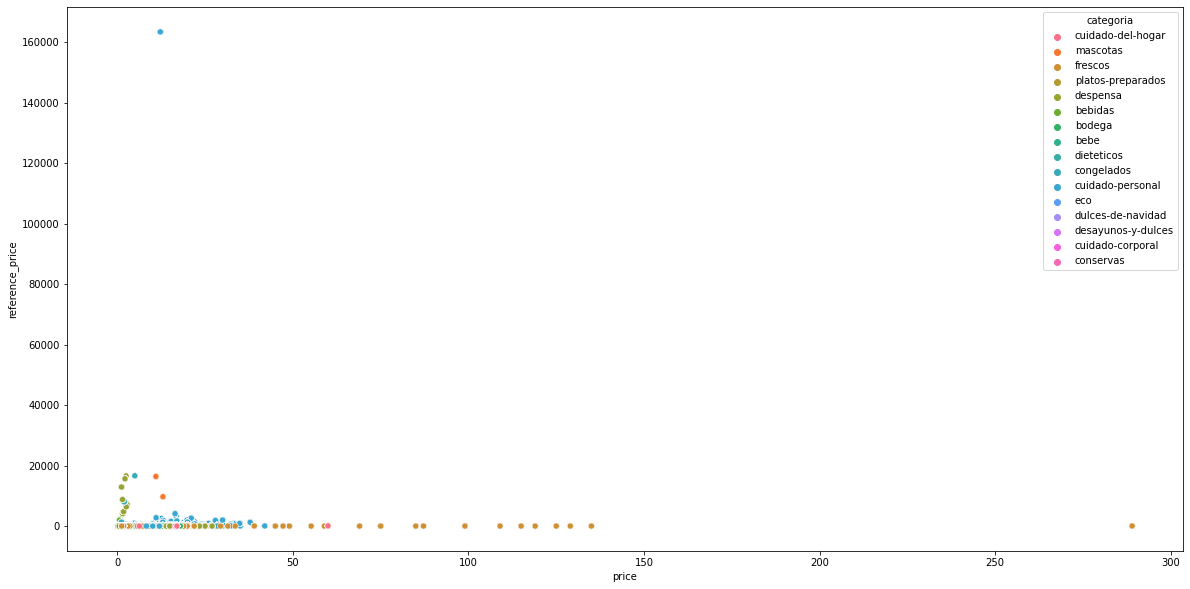

In [ ]:
##Relación entre precios, referencia de precios y categorías
plt.figure(figsize=(20,10))
sns.scatterplot(data = df_final2, x = "price", y = "reference_price", hue = "categoria");

In [ ]:
df2 = df_final2[df_final2["reference_price"] < 20000]
df2.head()

,price,reference_price,product_id,reference_unit,insert_date,url,supermarket,name,description,date,date2,difference,categoria,subcategoria
0,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-02 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,NaN,2021-08-02,2021-08-02,0.0,cuidado-del-hogar,lavavajillas
1,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-03 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,NaN,2021-08-03,2021-08-03,0.0,cuidado-del-hogar,lavavajillas
2,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-04 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,NaN,2021-08-04,2021-08-04,0.0,cuidado-del-hogar,lavavajillas
3,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-05 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,NaN,2021-08-05,2021-08-05,0.0,cuidado-del-hogar,lavavajillas
4,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-06 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,NaN,2021-08-06,2021-08-06,0.0,cuidado-del-hogar,lavavajillas


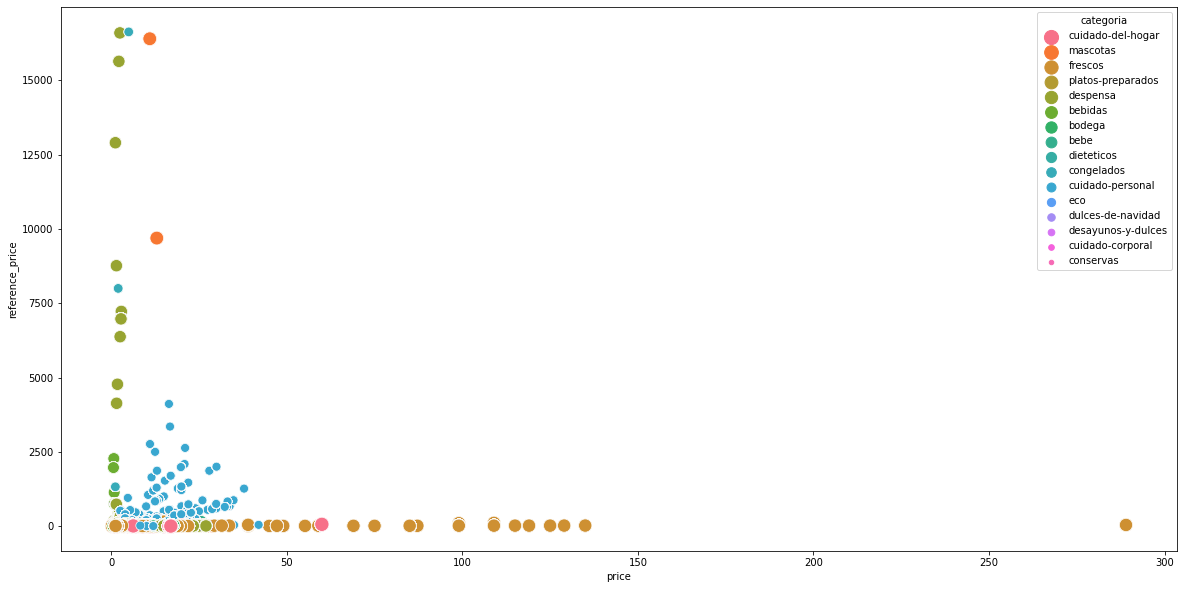

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(data = df2, x = "price", y = "reference_price", hue = "categoria", size = "categoria",  sizes=(20, 200));

In [ ]:
# analíticamente con numpy
np.corrcoef(df2["price"], df2["reference_price"])

array([[1.        , 0.06091017],
       [0.06091017, 1.        ]])

In [ ]:
# analíticamente con pandas

df2[["price", "reference_price"]].corr()

,price,reference_price
price,1.00000,0.06091
reference_price,0.06091,1.00000


## Funciones para crear graficas y sus caracteristicas

In [ ]:
def caract_graficas(titulo, nombre_eje_x, nombre_eje_y, rotacion = 90, tamaño = (20,8)):
        
        font_title = {'family': 'garamond',
            'color':  'black',
            'weight': 'bold', # puede ser bold, normal, medium
            'size': 16,
            'style' : "italic",
            }
        
        font_axis = {'family': 'garamond',
            'color':  'red',
            'weight': 'normal', # puede ser bold, normal, medium
            'size': 12
            }

        plt.figure(figsize=tamaño)

        plt.title(titulo, fontdict= font_title)
        plt.ylabel( nombre_eje_y, fontdict = font_axis)
        plt.xlabel( nombre_eje_x, fontdict = font_axis)

        plt.tick_params(axis='both', labelsize=12)

        plt.xticks(rotation=rotacion)

In [ ]:
def crear_grafica(df ,eje_x, eje_y, tipo_grafica = "barplot", paleta_color = "YlOrBr" ):

    tipo_grafica = tipo_grafica.lower()

    pregunta = input("Quieres hacer la gráfica con un filtro por categoria (S/N): ")


    if pregunta == "S":

        categoria = input("¿Sobre que categoría quieres hacer las gráficas?")
        titulo = input("Que titulo le quieres poner a tu gráfica: ")

        df = df[df["categoria"] == categoria]

        if tipo_grafica == "barplot":
            caract_graficas( titulo, "subcategoria", "price")
            sns.barplot(data = df, x = eje_x, y = eje_y, palette=sns.color_palette(paleta_color))
            
        elif tipo_grafica == "violinplot":
            caract_graficas( titulo,  "price", "platos_preparados")
            sns.violinplot(data = df, x = eje_x, y = eje_y, palette=sns.color_palette(paleta_color))  
        elif tipo_grafica == "boxplot":
            caract_graficas( titulo, "price", "platos_preparados")
            sns.boxplot(data = df, x = eje_x, y = eje_y, palette=sns.color_palette(paleta_color))  

        elif tipo_grafica == "scatterplot":
            caract_graficas( titulo, "price", "platos_preparados")
            sns.scatterplot(data=df, x = eje_x, y= eje_y)

    else: 
        pass
    


In [ ]:
df_final2.categoria.unique()

array(['cuidado-del-hogar', 'mascotas', 'frescos', 'platos-preparados',
       'despensa', 'bebidas', 'bodega', 'bebe', 'dieteticos',
       'congelados', 'cuidado-personal', 'eco', 'dulces-de-navidad',
       'desayunos-y-dulces', 'cuidado-corporal', 'conservas'],
      dtype=object)

findfont: Font family ['garamond'] not found. Falling back to DejaVu Sans.
findfont: Font family ['garamond'] not found. Falling back to DejaVu Sans.


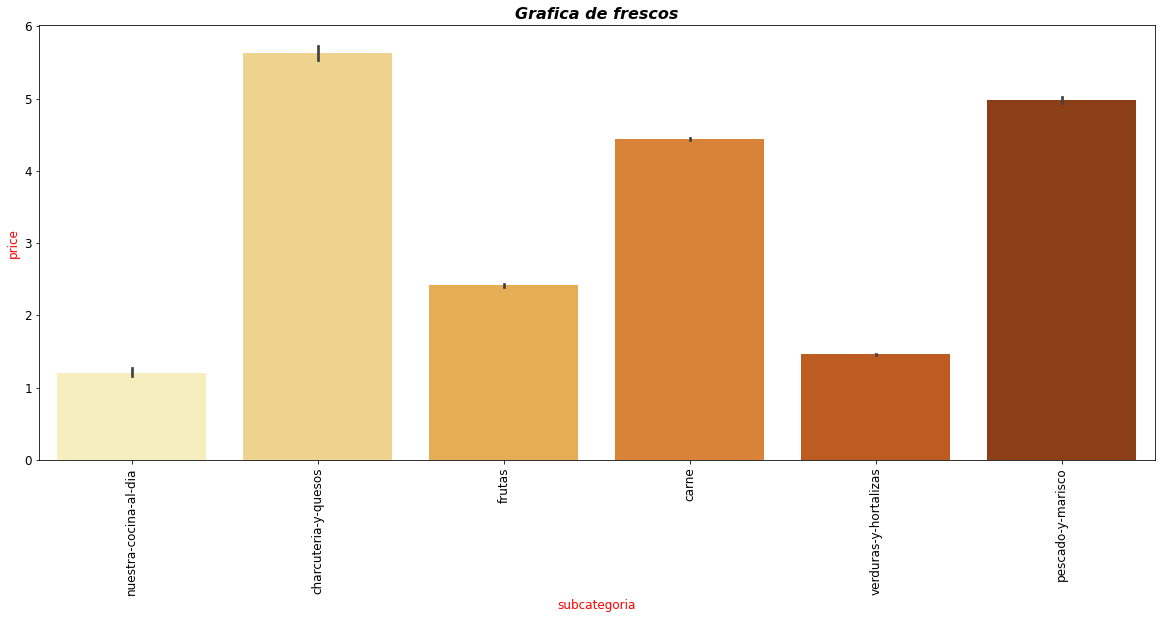

In [ ]:
crear_grafica(df_final2, "subcategoria", "price")

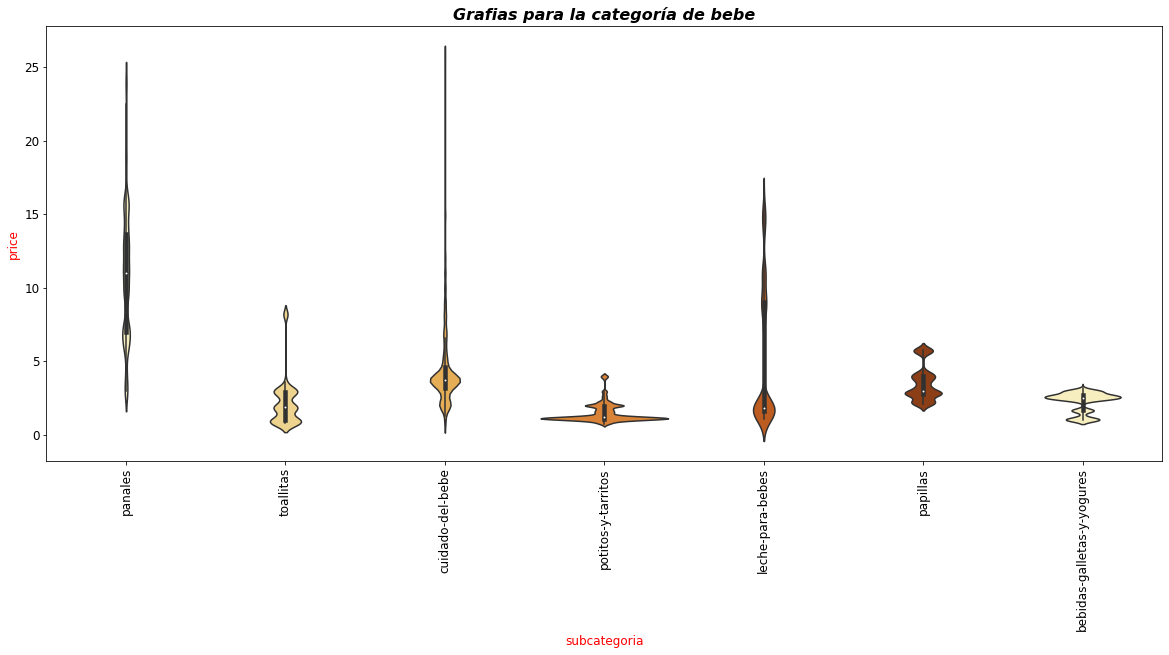

In [ ]:
crear_grafica(df_final2, "subcategoria", "price", "violinplot")

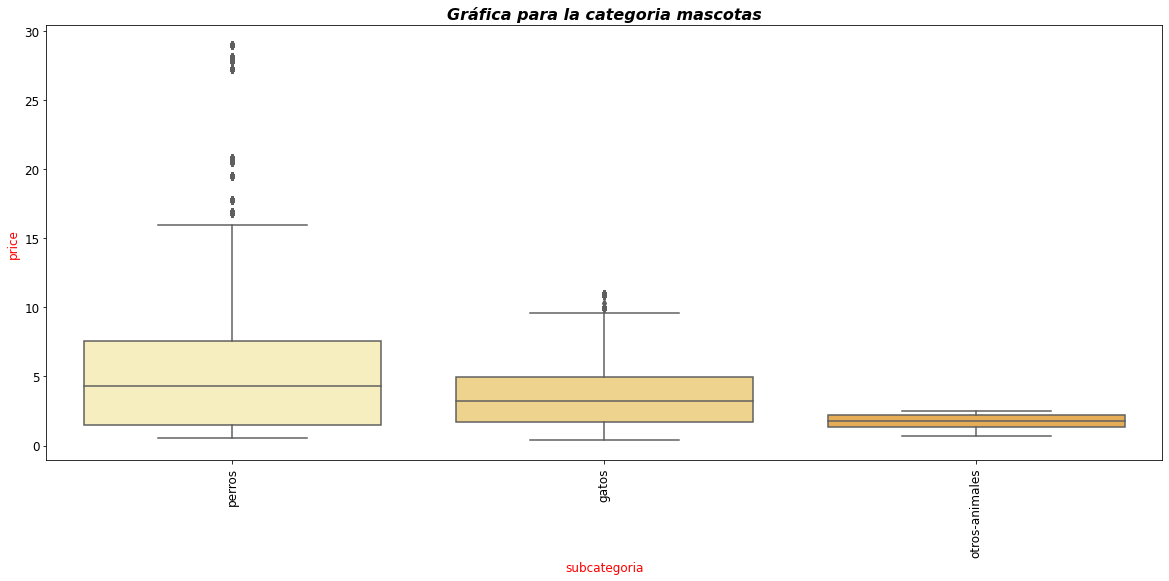

In [ ]:
crear_grafica(df_final2, "subcategoria", "price", "boxplot")

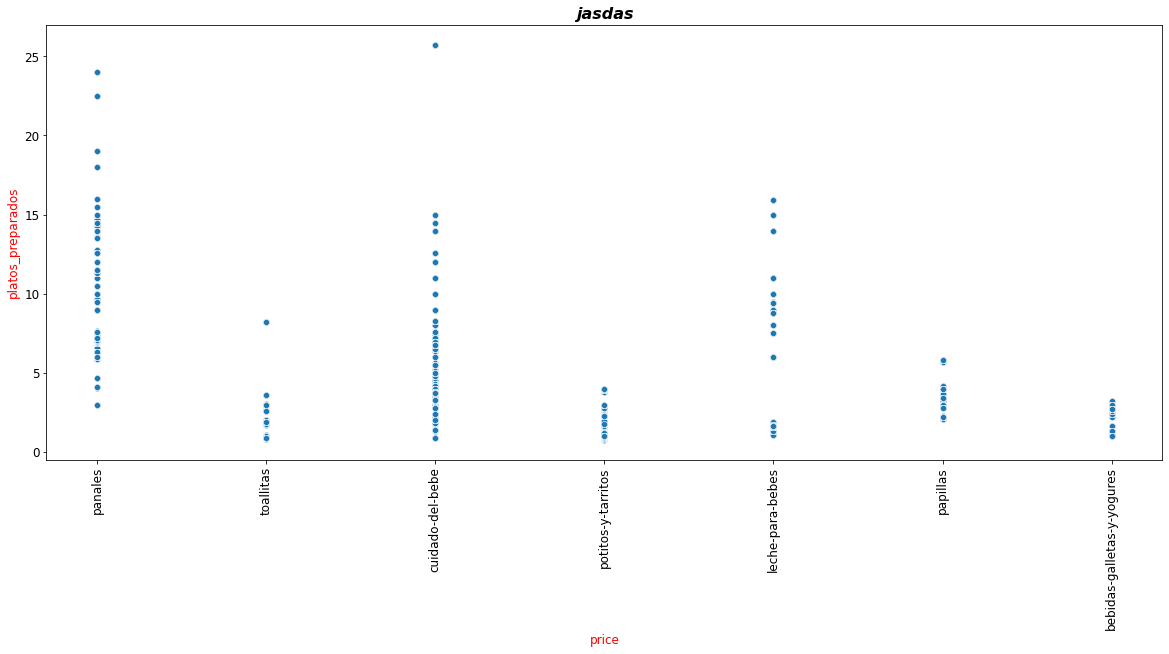

In [ ]:
crear_grafica(df_final2, "subcategoria", "price", "scatterplot")

**Bonus**

Por si da tiempo, algo de fantasía con un pie chart y con nubes de palabras. 

In [ ]:
df_final2.head(1)

,price,reference_price,product_id,reference_unit,insert_date,url,supermarket,name,description,date,date2,difference,categoria,subcategoria
0,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-02 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,NaN,2021-08-02,2021-08-02,0.0,cuidado-del-hogar,lavavajillas


In [69]:
df_pie = pd.DataFrame(df_final2.groupby(['reference_unit'])
                      ["price"].mean()).reset_index()

df_pie

,reference_unit,price
0,kg,2.936545
1,l,3.745480
2,lavado,6.620565
3,m,2.168132
4,ud,4.301429


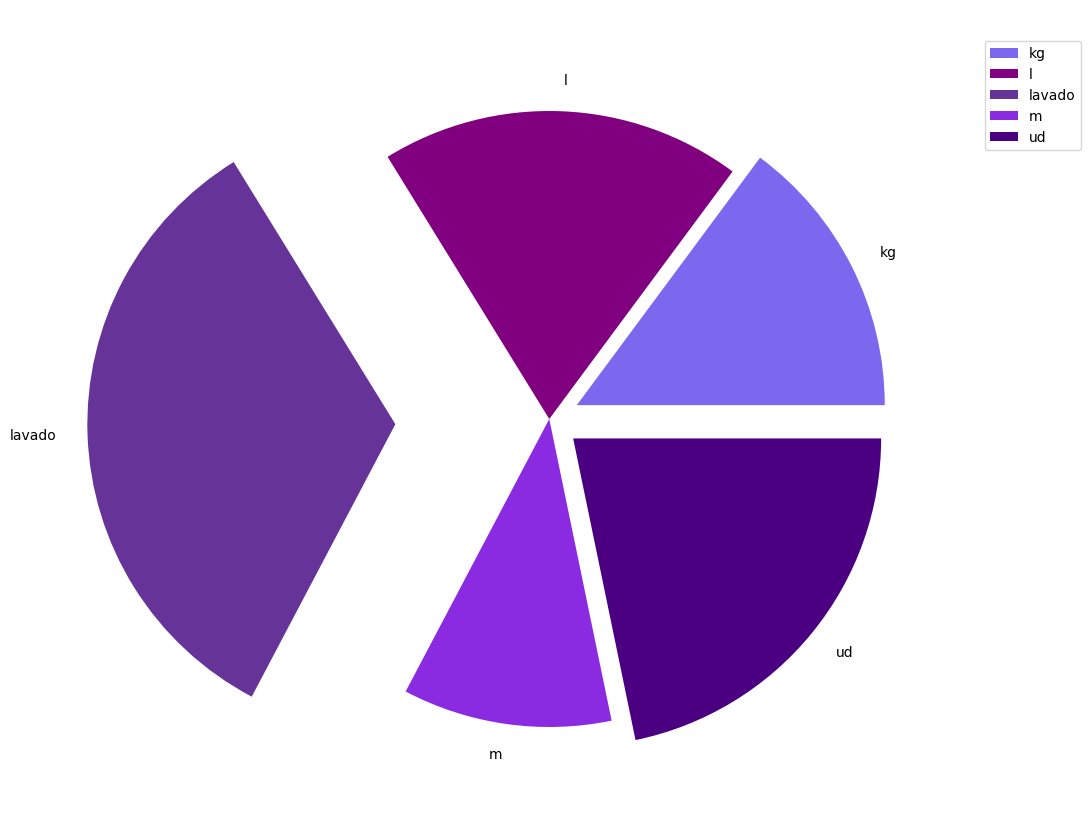

In [70]:
colors = ['mediumslateblue', 'purple', 'rebeccapurple', 'blueviolet' ,'indigo'] # para establecer los colores

explode = ( 0.1 ,0, 0.5, 0, 0.1) # para sacar los quesitos hacia fuera

plt.figure(figsize=(10,10))

plt.pie(df_pie['price'], 
       labels = df_pie["reference_unit"], 
       colors = colors, # para cambiar el color de la gráfica
       explode = explode)  # para sacar los quesitos hacia fuera

plt.title("Precio medio por unidades", color = "white", fontsize = 16, fontweight = "bold") # para poner el título
plt.legend(bbox_to_anchor=(1.2, 1)) # sacar leyenda y donde colocarla. El primer índice (derecha-izquierda), segundo índice(arriba, abajo) )
plt.show();

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
def generate_cloud_normal(df, column):

    # Joining all the words in the description column into one string.
    text = " ".join(cat for cat in df[column])

    word_cloud = WordCloud(
        width=7000,
        height=2000,
        background_color="black",
        colormap="OrRd",
        collocations=True,
        stopwords=STOPWORDS,
        ).generate(text)

    # Showing the word cloud.
    plt.imshow(word_cloud)


    # Turning off the axis.
    plt.axis("off")

    # Showing the word cloud.
    plt.show()

    #word_cloud.to_file(f'../images/world_clouds/{filename}.png')

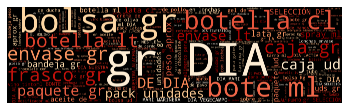

In [ ]:
generate_cloud_normal(df_final2, "name")